# Distribución Exponencial



Para simular valores con distribución exponencial, se utilizará la función acumulada de probabilidad (f.a.p) para obtener de ésta valores aleatorias de forma similar a cómo se hizo con la f.a.p. uniforme. A continuación se muestra el procedimiento para obtener la expresión que se incorporará en un programa en Python.



Sea la f.a.p. exponencial $F(x)=1-e^{\lambda x}$ a quien se le aplicará el método de transformación inversa para obtener la expresión (1).



$1-e^{-\lambda x}=U$



$-e^{-\lambda x}=U-1$



$e^{-\lambda x}=1-U$



${-\lambda x}=ln(1-U)$



$x= -\frac{ln(1-U)}{\lambda} ... (1)$



Dada la expresión (1), se elaborará un programa en Python que simule un evento de naturaleza exponencial.

In [1]:
import numpy as np

In [4]:
def generar_valores_exponenciales(l=-1):
    '''
    Objetivo: Generar valores artificiales con comportamiento exponencial.
    Entrada:
        l:valor de de lambda
    Salida:
        x= valor numerico con comportamiento exponencial
    
    '''
    #validar las entradas
    if l<0:
        return 0
    
    u = np.random.rand()
    
    x = -np.log(1-u) / l
    
    return x

In [6]:
mi_lambda = 0.01

for i in range(10):
    x = generar_valores_exponenciales(mi_lambda)
    r = round(x,0)
    print("{}: {:10f} \t  {}".format(i,x,r))






0:  19.769640 	  20.0
1:  70.631738 	  71.0
2: 271.728235 	  272.0
3: 256.259818 	  256.0
4:  32.096086 	  32.0
5: 108.642260 	  109.0
6:  78.607517 	  79.0
7:  87.076313 	  87.0
8: 117.030402 	  117.0
9:   2.145275 	  2.0


# Binomial negativa



Mide el número de fracasos necesarios hasta conseguir $r \geq 0$ éxitos con $p$ que es la probabilidad de éxito del evento y $(1-p)$ la probabilidad de fracaso.

In [16]:
import numpy as np

In [25]:
def generar_binomial_negativa(pr_exito=-1.0, numero_de_exitos = -1.0, num_experimentos = 10_000):
    '''
        Objetivo: Simular una distribucion binomial negativa
        Entrada:
            pr_exito: Probabilidad de exito
            numero_de_exitos: Numero de exitos que se desean alcanzar
            num_experimentos: Numero de simulaciones a realizar
        Salida:
            resultado: Numero de fracasos que se presentaran ante de alcanzar el numero de exitos deseados (i.e., numero_de_exitos)
    
    '''
    
    #validar las entradas
    
    if(pr_exito <= 0.0 or numero_de_exitos <= 0.0):
        return 0
    i           = 0 #indice de los experimientos
    exito       = 0 #contados de los exitos
    fracaso     = 0 #contador de los fracasos
    suma        = 0 #suma/acumula el numero de fracasos
    
    while(i<num_experimentos):
        u = np.random.rand() #generar una probabilidad uniforme
    
        if(u >= pr_exito):
            fracaso += 1 # se contabiliaza un nuevo fracaso
        else:
            exito += 1 # se contabiliza un nuevo exito
            if(exito == numero_de_exitos):
                suma    += fracaso
                exito   = 0
                fracaso = 0
                i += 1
                
    resultado = (float(suma)) / num_experimentos
    return resultado

In [26]:
exitos = 9 #numero de exitos que se desean obtener

for i in range(10):
    
    
    
    x = generar_binomial_negativa(pr_exito = 0.3, numero_de_exitos = exitos, num_experimentos =10_000)
    print("Fracasos antes de obtener {} exitos: {}".format(exitos,x))

Fracasos antes de obtener 9 exitos: 20.9746
Fracasos antes de obtener 9 exitos: 21.0556
Fracasos antes de obtener 9 exitos: 21.0085
Fracasos antes de obtener 9 exitos: 20.9912
Fracasos antes de obtener 9 exitos: 20.9055
Fracasos antes de obtener 9 exitos: 20.8911
Fracasos antes de obtener 9 exitos: 21.04
Fracasos antes de obtener 9 exitos: 20.9603
Fracasos antes de obtener 9 exitos: 21.0888
Fracasos antes de obtener 9 exitos: 20.9985


# Distribucion Pascal


In [29]:
def generar_pascal(pr_exito = -1.0, num_experimentos = 10_000):
    '''
    Objetivo: Simular una distribución Pascal.
              Esta se estimara a partir de la distribución binomial negativa.
              
    Entrada:
              pr_exito: Probabilidad de exito
              num_experimientos : Numero de simulaciones a realizar
    Salida:
              resultado: Numero de fracasos que se presentaran antes de alcanzar un exito
    
    '''
    
    if pr_exito <= 0.0:
        return 0
    
    resultado = generar_binomial_negativa(pr_exito = pr_exito, numero_de_exitos = 1, num_experimentos = num_experimentos)
    
    return resultado

In [30]:

for i in range(10):
    x = generar_pascal(pr_exito = 0.3, num_experimentos = 10_0000)
    print("Fracasos antes del primer éxito: {}".format(x))

Fracasos antes del primer éxito: 2.34381
Fracasos antes del primer éxito: 2.34083
Fracasos antes del primer éxito: 2.32537
Fracasos antes del primer éxito: 2.3206
Fracasos antes del primer éxito: 2.33135
Fracasos antes del primer éxito: 2.34392
Fracasos antes del primer éxito: 2.31807
Fracasos antes del primer éxito: 2.32179
Fracasos antes del primer éxito: 2.32824
Fracasos antes del primer éxito: 2.33193


<br><br>

# Distribución de Normal (Box-Muller)




$Z = R cos(\Theta) = (-2ln(r_1))^{1/2} cos(2\pi r_2)$, siendo $0 \leq r_1$,$r_2 \leq 1$ valores uniformes.



o bien,




$Z = R sin(\Theta) = (-2ln(r_1))^{1/2} sin(2\pi r_2)$, siendo $0 \leq r_1$,$r_2 \leq 1$ valores uniformes.

In [ ]:
import numpy as np

In [48]:
def generar_Z_normal_Box_Muller():
    '''
    Objetivo: Generar un valor aleatorio normal con media = 0 y varianza = 1
              utilizando el metodo de Box-Muller
    Entreda:
        ninguna.
    
    Salida:
        resultado: valor de probabilidad normal
    
    
    '''
    
    r_1 = np.random.rand()
    r_2 = np.random.rand()
    
    #Z = ((-2*np.log(r_1))*0.5) * (np.sin(2*3.14159265*r_2))
    Z = ((-2*np.log(r_1))*0.5) * (np.sin(2*np.pi      *r_2))

    resultado = Z
    
    return resultado

In [57]:
%%time
z= []
num_datos = 5_000
for i in range(0,num_datos):
    x=generar_Z_normal_Box_Muller()
    z.append(x)
    

Wall time: 29.4 ms


In [49]:
z

[0.7726552977871807,
 0.8188834050845023,
 -1.494784532432505,
 -0.3285132298054501,
 -3.11240204673164,
 0.005076289704116247,
 -0.10318403592164964,
 0.07157198796760306,
 0.3756291409352089,
 -0.036404838709334135,
 0.056395604489853,
 1.0986475632479293,
 -0.7872925049701238,
 -1.6848944840450473,
 0.05910434799700367,
 -0.30865748952804684,
 -0.912751849223297,
 0.22822194037471608,
 0.937247766259156,
 -0.5170517797364989,
 0.1691240369394492,
 0.5593540696787257,
 -0.2697364298482255,
 -2.148594775656743,
 0.9343120146254411,
 -0.34827735993063225,
 -0.8662059325545984,
 -1.0656645199389556,
 -4.037654926817015,
 1.601074851426019,
 0.38108517573537337,
 1.1825209114616462,
 -0.5486418282943665,
 -0.7256963614150596,
 0.3908597658096399,
 -0.32150534131350045,
 0.19460085303551455,
 -0.9572397912754625,
 -0.060889628136175454,
 0.2825531048471506,
 -0.09879915245670538,
 0.9453146337376077,
 0.5935852738499743,
 0.5385089911829932,
 -0.8503036378033655,
 0.37038973203151504,
 0.

In [61]:
#Agrupar los valores generados



dicc_Z={
    "-6.0":0,
    "-5.0":0,
    "-4.0":0,
    "-3.0":0,
    "-2.0":0,
    "-1.0":0,
    "0.0":0,
    "1.0":0,
    "2.0":0,
    "3.0":0,
    "4.0":0,
    "5.0":0,
    "6.0":0
}



#recorrer el contenido del vector z
for x in z:
#agrupar los valores del vector z de acuerdo al intervalo de confianza

    cadena = str(round(x,0))
    if cadena=="-0.0" or cadena=="0.0":
        cadena="0.0"

    dicc_Z[cadena]+=1
print(cadena)

-2.0


In [62]:
#convertir el diccionario en una lista
lst_Z=[] #frecuencia absoluta
lst_prob=[] #probabilidad
lst_etiqueta=[] #descripción de cada intervalo



for x in dicc_Z:
    lst_etiqueta.append(x) #tomar el valor de la etiqueta del intervalo
    lst_Z.append(dicc_Z[x]) #tomar la frecuencia relativa
    lst_prob.append(dicc_Z[x]/num_datos) #calcular la probabilidad

Graficar los datos


In [ ]:
import matplotlib.pyplot as plt

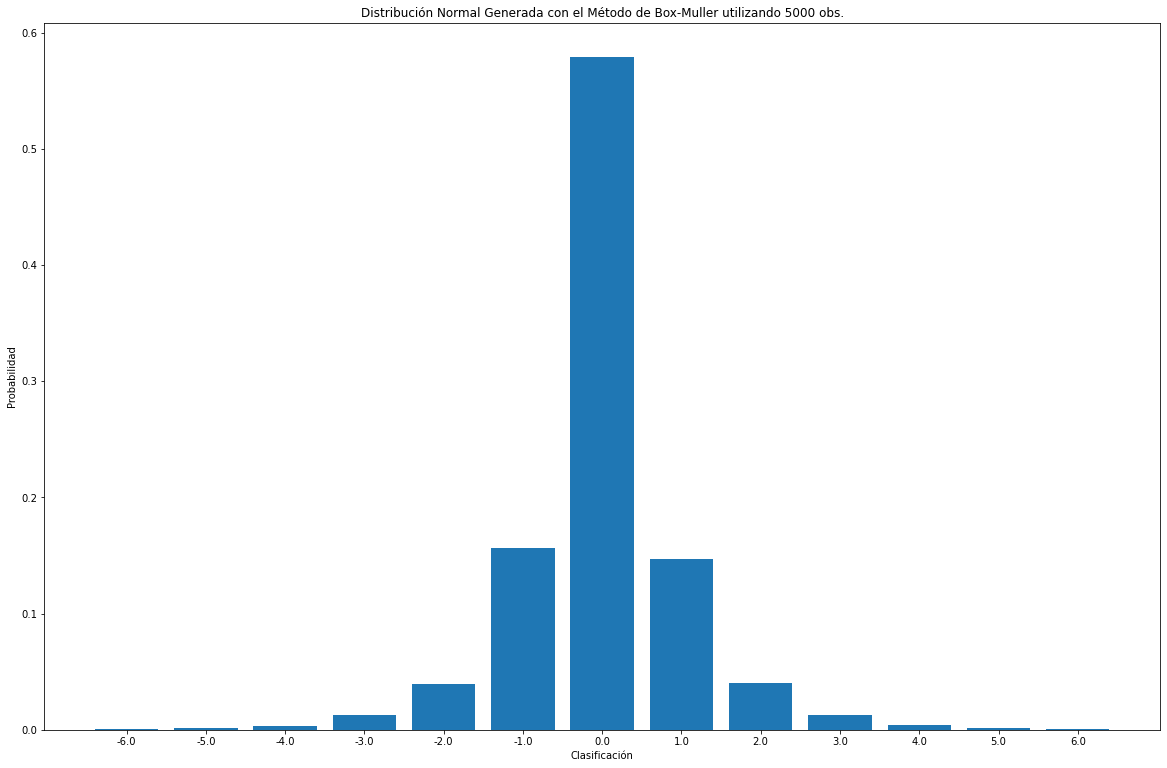

In [64]:
# Graficar la distribución de los datos
label=lst_etiqueta
data =lst_prob #lst_Z



plt.rcParams["figure.figsize"] = (20,13)



plt.xlabel('Clasificación')
plt.ylabel('Probabilidad')



titulo="Distribución Normal Generada con el Método de Box-Muller utilizando " + str(num_datos) + " obs."
plt.title(titulo)



plt.bar(label,data)
plt.show()